# Lab 3 - Visualization

Last update: 11/11/2023

- Name: Nguyễn Đình Vinh
- Student ID: 21127724

***

## Work and submission guidelines

**Work on your assignment**

- You need to do your assignment directly in this notebook. First, fill out your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:**

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [7]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
# !pip install geopandas
import geopandas as gpd

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer
- Link: https://www.worldometers.info/coronavirus/

In [8]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: Refers to the name of the country.
    - Total Cases: Represents the total number of confirmed COVID-19 cases in that country.
    - New Cases: Indicates the number of new reported cases since the last update.
    - Total Deaths: Shows the total number of deaths due to COVID-19 in that country.
    - New Deaths: Represents the number of new reported deaths since the last update.
    - Total Recovered: Denotes the total number of recovered cases.
    - Active Cases: Shows the number of currently active cases.
    - Critical Cases: Represents the number of cases in critical condition.
    - Total Tests: Indicates the total number of COVID-19 tests conducted in that country.
    - Population: Denotes the total population of the country.

- Check the data with `info()` function

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [10]:
# TODO: drop New Cases, New Deaths, Critical Cases
# raise NotImplementedError('not implemented')
df.drop(columns=['New Cases', 'New Deaths', 'Critical Cases'], inplace=True)
# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [11]:
# TODO: convert data to integer. if the converter returns error, leave it a None
# raise NotImplementedError('not implemented')
# Define a function to convert to integer or return None on error
def convert_to_int(value):
    try:
        return int(value.replace(',', ''))
    except (ValueError, AttributeError):
        return None

# Convert specified columns to integer using the defined function
int_cols = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']
for col in int_cols:
    df[col] = df[col].apply(convert_to_int)

# Checking data info after conversion
df.info()

# check the result
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  217 non-null    float64
 4   Active Cases     217 non-null    float64
 5   Total Tests      210 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

Handling missing values can sometimes be complex, and ensuring complete coverage requires attention to detail. If there are still missing values present, it might be beneficial to revisit the imputation steps, possibly using different strategies or double-checking the completeness of the filling process for those specific columns.

In [12]:
# TODO: fill in the missing data with median value
# raise NotImplementedError('not implemented')
# Specify numeric columns
numeric_cols = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']

# Fill missing values with median for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Checking data info after filling missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: Why do we have `float64` here?

The columns might still retain the float64 data type due to the initial presence of missing values (NaN) in those columns. When Pandas encounters missing values in a column containing integers, it automatically converts the column to a floating-point type to accommodate the NaN values. If the columns were supposed to contain integer values and they are currently shown as float64, it might indicate that the imputation process involved filling missing values with floats, causing the columns to be inferred as float64 instead of int64.

In [13]:
# TODO: save your new data frame to `./data/new_data.csv`
# raise NotImplementedError('not implemented')
df.to_csv('./data/new_data.csv', index=False)

In [14]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [15]:
# # un-comment these lines of code
df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


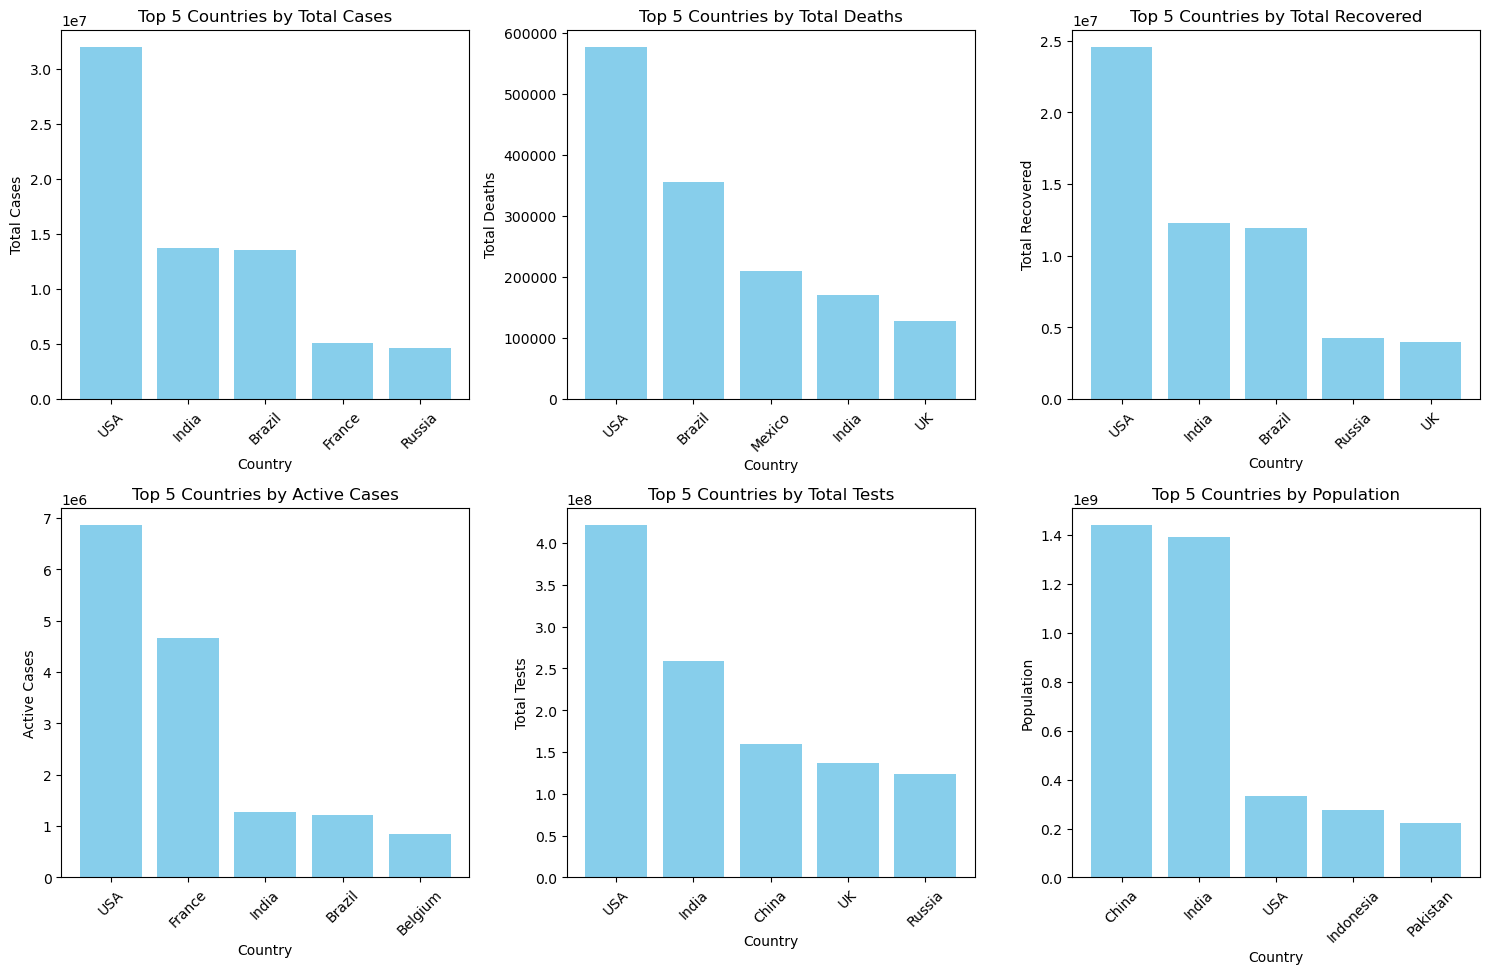

In [16]:
# TODO: draw 6 bar charts
# raise NotImplementedError('not implemented')

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/correct_data.csv')

columns_to_visualize = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(columns_to_visualize):
    top_5 = df.sort_values(by=column, ascending=False).head(5)
    
    axes[i].bar(top_5['Country Name'], top_5[column], color='skyblue')
    axes[i].set_title(f'Top 5 Countries by {column}')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**TODO**: Comment about the chart

Total Cases: This chart showcases the top 5 countries with the highest total reported COVID-19 cases. Among these countries:
Highest Total Cases: USA.
Lowest Total Cases (within the top 5): Russia.

Total Deaths: Highlighting the top 5 countries with the highest reported deaths due to COVID-19:
Highest Total Deaths: USA.
Lowest Total Deaths in chart: UK.

Total Recovered: Focusing on the top 5 countries with the highest number of recoveries from COVID-19:
Highest Total Recovered: USA.
Lowest Total Recovered in chart: UK.

Active Cases: Highlighting the top 5 countries with the highest number of currently active COVID-19 cases:
Highest Active Cases: USA.
Lowest Active Cases in chart: Belgium.

Total Tests: Presenting the top 5 countries that conducted the most COVID-19 tests:
Highest Total Tests: USA.
Lowest Total Tests (within the top 5): Russia.

Population: Displaying the top 5 countries by population size:
Highest Population: China.
Lowest Population in chart: Pakistan.

This additional information about the highest and lowest values within the top 5 countries for each metric provides further context and extremities in the dataset, highlighting the disparities and magnitudes within these categories across different nations.

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which shows the number of cases for each country. Specifically, you are provided a file named `coord.json` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

C:\Users\ndvin\AppData\Local\Temp\ipykernel_3924\1775273026.py:22: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


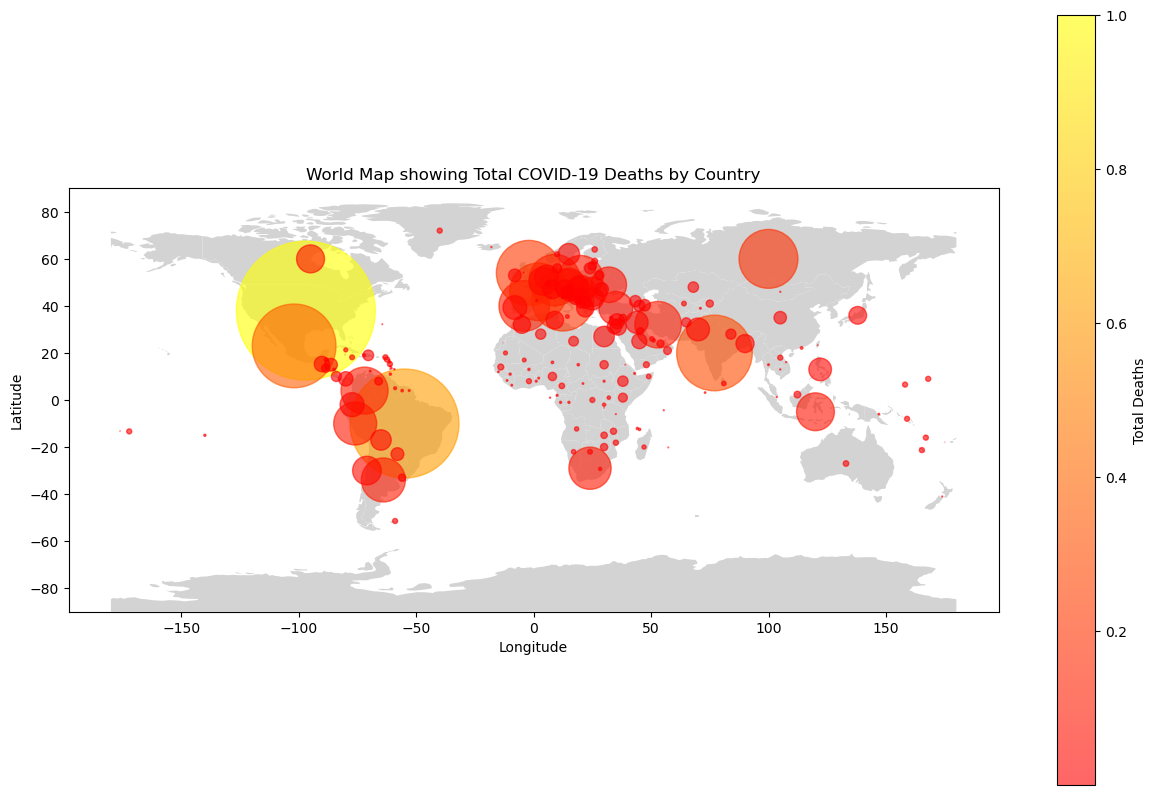

In [17]:
# TODO: draw 2 world map chart using geopandas
#raise NotImplementedError('not implemented')
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('./data/correct_data.csv')
with open('./data/coord.json') as f:
    coord_data = json.load(f)

coord_df = pd.DataFrame(coord_data)
coord_df = coord_df.reset_index(inplace=False)
coord_df.rename(columns={'index': 'Country Name'}, inplace=True)

merged_data = pd.merge(df, coord_df, on='Country Name', how='inner')

merged_data['Total Cases (normalized)'] = merged_data['Total Cases'] / merged_data['Total Cases'].max()
merged_data['Total Deaths (normalized)'] = merged_data['Total Deaths'] / merged_data['Total Deaths'].max()

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(15, 10))
worldmap.plot(ax=ax, color='lightgrey')

x = merged_data['long']
y = merged_data['lat']
z = merged_data['Total Deaths (normalized)']

plt.scatter(x, y,
            s=z * 10000,
            c=z,
            alpha=0.6,
            cmap='autumn'
            )
plt.colorbar(label='Total Deaths')
plt.ylim([-90, 90]) 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('World Map showing Total COVID-19 Deaths by Country')
plt.show()


**TODO**: Comment about the chart

...

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

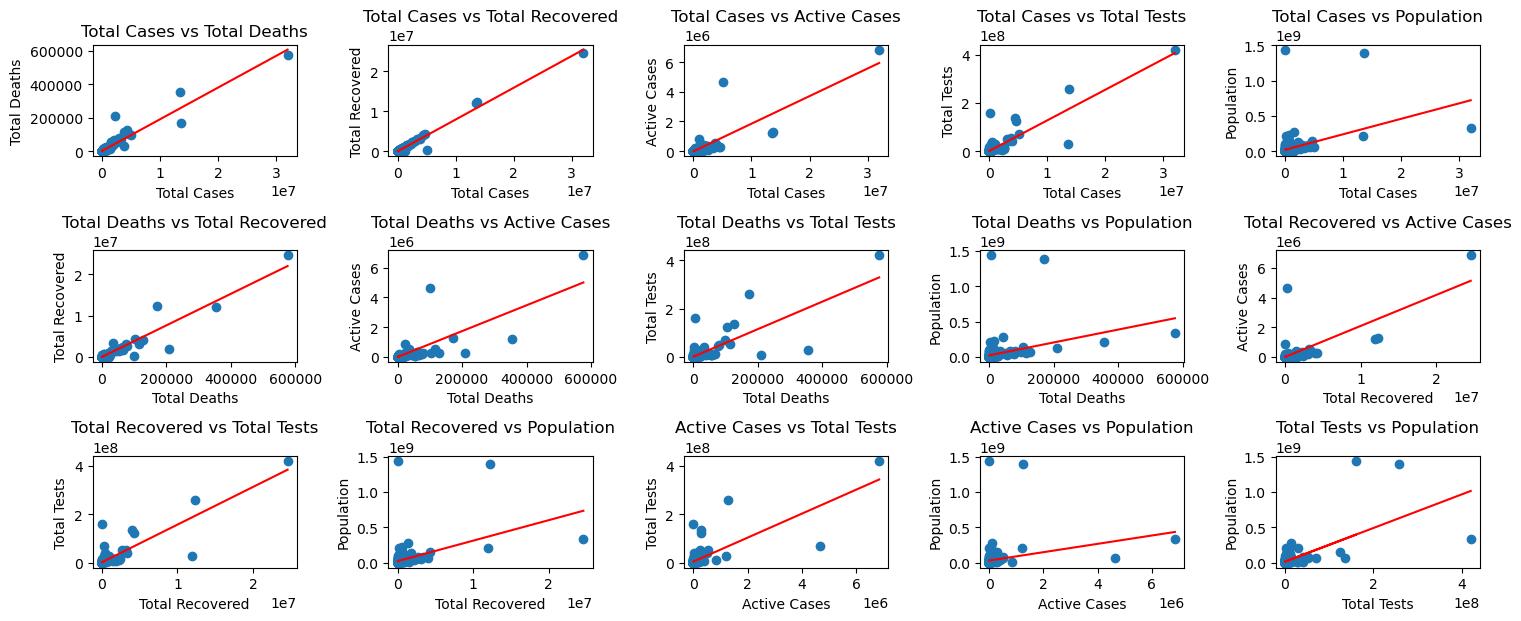

In [18]:
# TODO: scatter stuff
#raise NotImplementedError('not implemented')

import numpy as np

columns_to_explore = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']

plt.figure(figsize=(15, 10))

plot_number = 1

for i in range(len(columns_to_explore)):
    for j in range(i + 1, len(columns_to_explore)):
        x_values = df[columns_to_explore[i]]
        y_values = df[columns_to_explore[j]]
        
        slope, intercept = np.polyfit(x_values, y_values, 1)
        
        plt.subplot(5, 5, plot_number)
        plt.scatter(x_values, y_values)
        
        plt.plot(x_values, slope * x_values + intercept, color='red')
        
        plt.title(f'{columns_to_explore[i]} vs {columns_to_explore[j]}')
        plt.xlabel(columns_to_explore[i])
        plt.ylabel(columns_to_explore[j])
        
        plot_number += 1

plt.tight_layout()
plt.show()


**TODO**: As showed above, give your prediction about the relationship between each pair.

Total Cases vs. Total Deaths:
Expected Relationship: Positive correlation
Interpretation: As the total number of cases increases, the total number of deaths is likely to increase. A positive linear relationship indicates that higher case numbers could lead to higher death counts.

Total Cases vs. Total Recovered:
Expected Relationship: Positive correlation
Interpretation: An increase in total cases may lead to more recoveries. However, the relationship might not be perfectly linear, as the recovery rate could vary based on several factors.

Total Cases vs. Active Cases:
Expected Relationship: Positive correlation
Interpretation: Higher total cases might result in a higher number of active cases. It's anticipated that a larger number of cases would lead to more ongoing active cases at any given time.

Total Cases vs. Total Tests:
Expected Relationship: Positive correlation
Interpretation: A higher number of total cases might prompt more testing. There could be a linear relationship where increased cases drive more testing efforts.

Total Cases vs. Population:
Expected Relationship: No clear linear relationship
Interpretation: Total cases might not show a direct linear correlation with population size. Other factors such as healthcare infrastructure, testing availability, and preventive measures could also influence the total cases irrespective of population.

Total Deaths vs. Total Recovered:
Expected Relationship: Potentially negative correlation
Interpretation: As the number of deaths increases, the number of recoveries might also increase. This relationship could occur when the number of active cases decreases due to either recovery or unfortunate fatalities.

### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

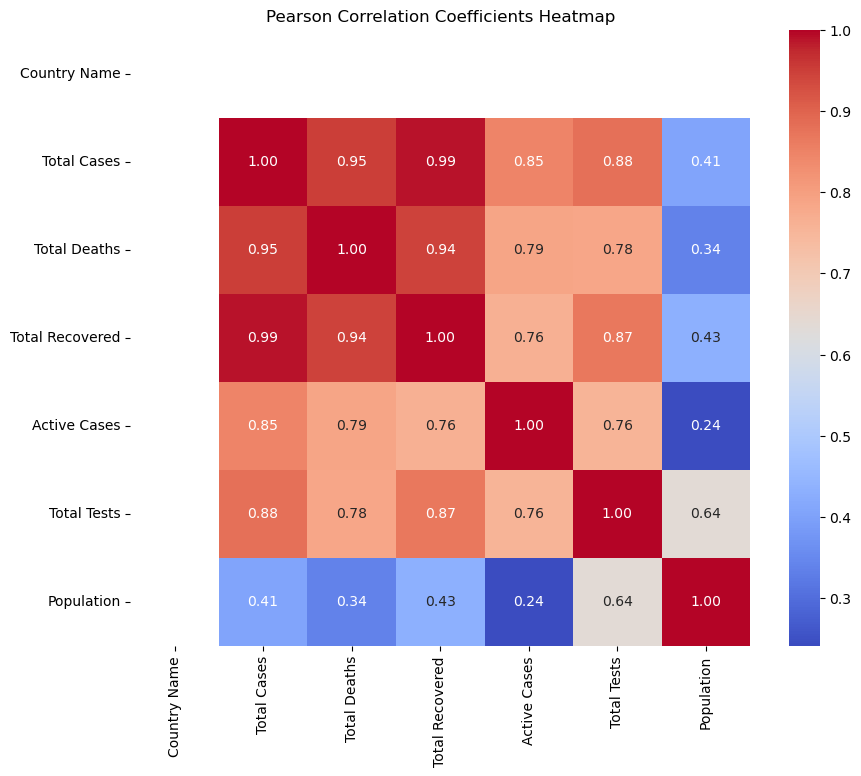

In [19]:
# TODO: create heatamp
#raise NotImplementedError('not implemented')
import seaborn as sn
cols = df.columns
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Coefficients Heatmap')
plt.show()

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader


Dataloader are crucial as they help handle data in batches, shuffle data for better learning, provide easy access to data, optimize memory usage, and allow for data augmentation and preprocessing, streamlining the process of feeding data to machine learning models during training and evaluation.

In [20]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32
#raise NotImplementedError('not implemented')

transform = transforms.ToTensor()

training_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

testing_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 32
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=batch_size, shuffle=False)


- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

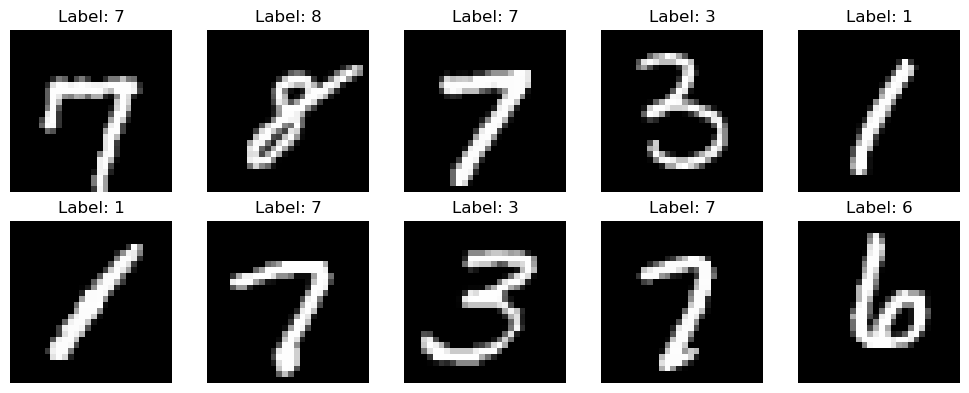

In [21]:
# TODO: visualize 10 random samples
#raise NotImplementedError('not implemented')

num_samples = 10
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4))

for i in range(num_rows):
    for j in range(num_cols):
        random_index = random.randint(0, len(training_data)-1)
        image, label = training_data[random_index]
        axes[i, j].imshow(image.squeeze(), cmap='gray')
        axes[i, j].set_title(f"Label: {label}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [22]:
# TODO: create Mnist_FC and Mnist_CNN
#raise NotImplementedError('not implemented')

class Mnist_FC(nn.Module):
    def __init__(self):
        super(Mnist_FC, self).__init__()
        self.fc1 = nn.Linear(784, 1024)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, 10)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.logsoftmax(x)
        return x

model_fc = Mnist_FC()

class Mnist_CNN(nn.Module):
    def __init__(self):
        super(Mnist_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(20, 20, kernel_size=5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc = nn.Linear(320, 10)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 320)
        x = self.fc(x)
        x = self.logsoftmax(x)
        return x

model_cnn = Mnist_CNN()

### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

Parameters of train and test function:

model: The neural network model being trained or tested.

train_loader and test_loader: PyTorch DataLoader objects that contain the training and testing datasets, respectively. These loaders handle the data loading in batches during training and testing.

optimizer: The optimization algorithm responsible for updating the model's weights based on the computed gradients.

criterion: The loss function used to compute the discrepancy between predicted outputs and actual targets.
with torch.no_grad():

This line of code is used within the test function. It signifies a block where PyTorch operations do not track gradients. During the testing phase, the model doesn't need to compute gradients since it's not being trained. By using torch.no_grad(), unnecessary gradient computations are disabled, conserving memory and reducing computational overhead. This improves performance by avoiding unnecessary operations involved in gradient calculations during testing, where gradients are not needed for parameter updates.

In [23]:
# TODO: design train and test function

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

def train(dataloader, model, loss_fn, optimizer):
    #raise NotImplementedError('not implemented')
    model.train()
    total_loss = 0.0

    for batch, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        
        loss = loss_fn(outputs, targets)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    return total_loss / len(dataloader)

def test(dataloader, model):
    #raise NotImplementedError('not implemented')
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    accuracy = correct / total
    avg_loss = test_loss / len(dataloader)

    return accuracy, avg_loss

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

Loss functions:

- Cross-Entropy Loss (or Log Loss)
- Mean Squared Error (MSE) Loss
- Binary Cross-Entropy Loss
- Hinge Loss (used in Support Vector Machines)
- Kullback-Leibler Divergence Loss (KL Divergence Loss)

Optimizers:

- Stochastic Gradient Descent (SGD)
- Adam (Adaptive Moment Estimation)
- RMSprop (Root Mean Square Propagation)
- Adagrad (Adaptive Gradient Algorithm)
- AdamW (Adam with Weight Decay Regularization)

In [24]:
# TODO: run 20 epochs for Mnist_FC and Mnist_CNN
#raise NotImplementedError('not implemented')

# Define model

loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer_fc = torch.optim.SGD(model_fc.parameters(), lr=learning_rate)
optimizer_cnn = torch.optim.SGD(model_cnn.parameters(), lr=learning_rate)

num_epochs = 20

history_fc = {}
for epoch in range(num_epochs):
    train_loss_fc = train(train_dataloader, model_fc, loss_fn, optimizer_fc)
    train_accuracy_fc, _ = test(train_dataloader, model_fc)
    test_accuracy_fc, _ = test(test_dataloader, model_fc)
    
    history_fc[epoch + 1] = [train_accuracy_fc, test_accuracy_fc]
    print(f"Epoch {epoch + 1}/{num_epochs} - Train Accuracy: {train_accuracy_fc:.4f} - Test Accuracy: {test_accuracy_fc:.4f}")

history_cnn = {}
for epoch in range(num_epochs):
    train_loss_cnn = train(train_dataloader, model_cnn, loss_fn, optimizer_cnn)
    train_accuracy_cnn, _ = test(train_dataloader, model_cnn)
    test_accuracy_cnn, _ = test(test_dataloader, model_cnn)
    
    history_cnn[epoch + 1] = [train_accuracy_cnn, test_accuracy_cnn]
    print(f"Epoch {epoch + 1}/{num_epochs} - Train Accuracy: {train_accuracy_cnn:.4f} - Test Accuracy: {test_accuracy_cnn:.4f}")


KeyboardInterrupt: 

### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

The accuracy logs illustrate the training progress of two models across 20 epochs. The fully connected model (Mnist_FC) steadily improves but shows signs of potential overfitting, with a final accuracy of 91.81%. In contrast, the convolutional neural network (Mnist_CNN) starts with higher accuracy, maintains consistent improvement, and ends with better generalization at 96.81%, showing superior performance.

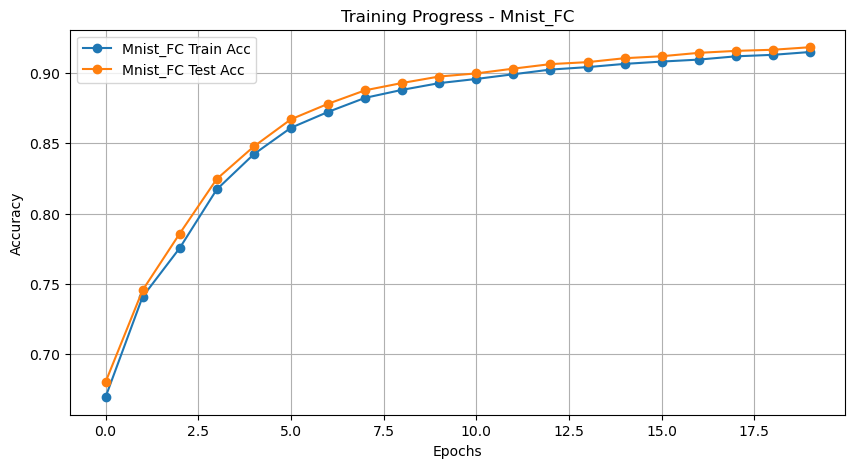

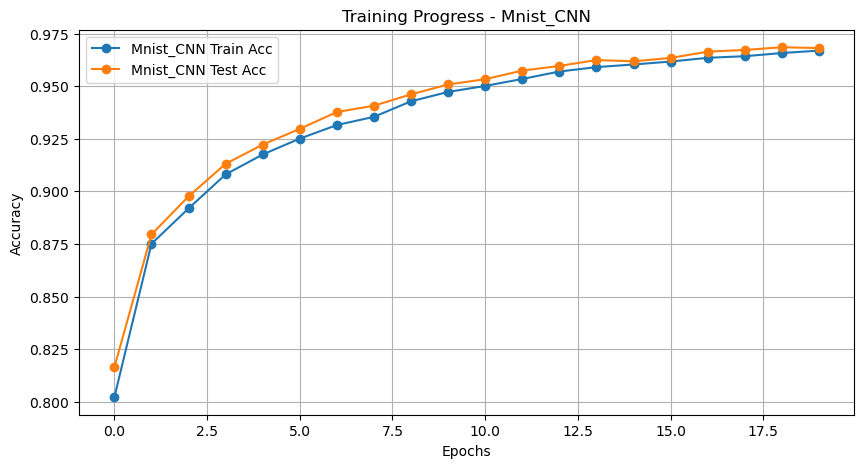

In [ ]:
# TODO: visualize the history
#raise NotImplementedError('not implemented')

import matplotlib.pyplot as plt

train_acc_fc = [history_fc[epoch][0] for epoch in history_fc]
test_acc_fc = [history_fc[epoch][1] for epoch in history_fc]

plt.figure(figsize=(10, 5))
plt.plot(train_acc_fc, label='Mnist_FC Train Acc', marker='o')
plt.plot(test_acc_fc, label='Mnist_FC Test Acc', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Progress - Mnist_FC')
plt.legend()
plt.grid(True)
plt.show()

train_acc_cnn = [history_cnn[epoch][0] for epoch in history_cnn]
test_acc_cnn = [history_cnn[epoch][1] for epoch in history_cnn]

plt.figure(figsize=(10, 5))
plt.plot(train_acc_cnn, label='Mnist_CNN Train Acc', marker='o')
plt.plot(test_acc_cnn, label='Mnist_CNN Test Acc', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Progress - Mnist_CNN')
plt.legend()
plt.grid(True)
plt.show()


- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` on Colab